<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 - Character Generator Model (Problem 2)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
# Enter your code here:
from tensorflow import keras
print('keras: ', keras.__version__)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.3.0-tf


### GitHub + Colab

In [2]:
#run for GitHub Colab
!git clone "https://github.com/OldManSteve/DL_Assg2.git"


Cloning into 'DL_Assg2'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 39 (delta 9), reused 35 (delta 6), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [3]:
#GitHub Colab directory
# Directories for files
holmes_file = '/content/DL_Assg2/holmes.txt'

In [4]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/DL_Assg2_Models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [24]:
# read in the text file, transforming everything to lower case
text = open(holmes_file).read().lower()
print('The original text has ' + str(len(text)) + ' characters.\n')

The original text has 562422 characters.



### 1.2 Data Processing


In [25]:
### print out the first 1000 characters of the raw text to get a sense of what characters to remove
text[:2000]

"\ufeffthe adventures of sherlock holmes by sir arthur conan doyle\n\n   i. a scandal in bohemia\n  ii. the red-headed league\n iii. a case of identity\n  iv. the boscombe valley mystery\n   v. the five orange pips\n  vi. the man with the twisted lip\n vii. the adventure of the blue carbuncle\nviii. the adventure of the speckled band\n  ix. the adventure of the engineer's thumb\n   x. the adventure of the noble bachelor\n  xi. the adventure of the beryl coronet\n xii. the adventure of the copper beeches\n\n\nadventure i. a scandal in bohemia\n\ni.\n\nto sherlock holmes she is always the woman. i have seldom heard\nhim mention her under any other name. in his eyes she eclipses\nand predominates the whole of her sex. it was not that he felt\nany emotion akin to love for irene adler. all emotions, and that\none particularly, were abhorrent to his cold, precise but\nadmirably balanced mind. he was, i take it, the most perfect\nreasoning and observing machine that the world has seen, but as

In [26]:
# remove all '\n' and '\r' from text
text = text.replace('\n','') 
text = text.replace('\r','')

print(text[:2000])

﻿the adventures of sherlock holmes by sir arthur conan doyle   i. a scandal in bohemia  ii. the red-headed league iii. a case of identity  iv. the boscombe valley mystery   v. the five orange pips  vi. the man with the twisted lip vii. the adventure of the blue carbuncleviii. the adventure of the speckled band  ix. the adventure of the engineer's thumb   x. the adventure of the noble bachelor  xi. the adventure of the beryl coronet xii. the adventure of the copper beechesadventure i. a scandal in bohemiai.to sherlock holmes she is always the woman. i have seldom heardhim mention her under any other name. in his eyes she eclipsesand predominates the whole of her sex. it was not that he feltany emotion akin to love for irene adler. all emotions, and thatone particularly, were abhorrent to his cold, precise butadmirably balanced mind. he was, i take it, the most perfectreasoning and observing machine that the world has seen, but as alover he would have placed himself in a false position. 

In [27]:
# create a function 'clean_text' to clean text so that only the following letters and punctation remain
def clean_text(text):
    punctuation = ['!', ',', '.', ':', ';', '?', '-', "'",' ']
    letters='abcdefghijklmnopqrstuvwxyz'
    
    # Enter your code here:
    clean_text=''

    for i in text:
      if i in punctuation or i in letters:
        clean_text+=i

    return clean_text

In [28]:
# clean data using clean_text function
text = clean_text(text)
text[:2000]

"the adventures of sherlock holmes by sir arthur conan doyle   i. a scandal in bohemia  ii. the red-headed league iii. a case of identity  iv. the boscombe valley mystery   v. the five orange pips  vi. the man with the twisted lip vii. the adventure of the blue carbuncleviii. the adventure of the speckled band  ix. the adventure of the engineer's thumb   x. the adventure of the noble bachelor  xi. the adventure of the beryl coronet xii. the adventure of the copper beechesadventure i. a scandal in bohemiai.to sherlock holmes she is always the woman. i have seldom heardhim mention her under any other name. in his eyes she eclipsesand predominates the whole of her sex. it was not that he feltany emotion akin to love for irene adler. all emotions, and thatone particularly, were abhorrent to his cold, precise butadmirably balanced mind. he was, i take it, the most perfectreasoning and observing machine that the world has seen, but as alover he would have placed himself in a false position. 

In [30]:
# count the number of unique characters in the text
chars = sorted(list(set(text)))

# print some of the text, as well as statistics
print ("This document has " +  str(len(text)) + " total number of characters.")
print ("This document has " +  str(len(chars)) + " unique characters.")

This document has 544340 total number of characters.
This document has 35 unique characters.


In [33]:
# create a function 'generate_text_io' to generate text inputs based on window_size and the corresponding labels
def generate_text_io(text, window_size):
    inputs = [] # store inputs
    labels = [] # stores label
    
    # Enter your code here:
    for i in range(0, len(text)-window_size):
      inputs.append(text[i:i+window_size])
      labels.append(text[i+window_size])
    
    print("Num of Sequences: ",len(inputs))
    return inputs, labels

In [34]:
# this dictionary is a function mapping each unique character to a unique integer
chars_to_indices = dict((c, i) for i, c in enumerate(chars))  # map each unique character to unique integer

# this dictionary is a function mapping each unique integer back to a unique character
indices_to_chars = dict((i, c) for i, c in enumerate(chars))  # map each unique integer back to unique character

In [45]:
import numpy as np

# create a function 'encode_io_pairs' to perform one-hot encoding of inputs and labels
def encode_io_pairs(text,window_size): # window_size determines # of characters in each input
    
    # Enter your code here:
    inputs, labels = generate_text_io(text, window_size)


    # Next, one-hot encode the characters into binary arrays.
    print('Vectorization...')
    x = np.zeros((len(inputs), window_size, len(chars)), dtype=np.bool)
    y = np.zeros((len(inputs), len(chars)), dtype=np.bool)
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            x[i, t, chars_to_indices[char]] = 1
        y[i, chars_to_indices[labels[i]]] = 1

    return x, y

In [46]:
# perform one-hot encoding of inputs and labels
window_size = 100
X, y = encode_io_pairs(text, window_size)

Num of Sequences:  544240
Vectorization...


### 1.3 Data Sampling

In [54]:
# Split the X & y into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
# Refer the report Appendix
# Please enter the random_state assigned to your group

## Step 2 – Develop a Character Generator Model

### Model #1 (Replicate as necessary for other models)

In [55]:
# Build the Model
# Enter your code here:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(window_size, len(chars)))) #multiclass single label classification
model.add(layers.Dense(len(chars), activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               83968     
_________________________________________________________________
dense_1 (Dense)              (None, 35)                4515      
Total params: 88,483
Trainable params: 88,483
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Train the Model
# Enter your code here:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128) 

Epoch 1/30
3402/3402 [==============================] - 92s 27ms/step - loss: 1.8018 - acc: 0.4699
Epoch 2/30
3402/3402 [==============================] - 91s 27ms/step - loss: 1.5614 - acc: 0.5375
Epoch 3/30
3402/3402 [==============================] - 91s 27ms/step - loss: 1.5007 - acc: 0.5541
Epoch 4/30
3402/3402 [==============================] - 90s 27ms/step - loss: 1.4686 - acc: 0.5632
Epoch 5/30
3402/3402 [==============================] - 90s 26ms/step - loss: 1.4475 - acc: 0.5689
Epoch 6/30
3402/3402 [==============================] - 90s 27ms/step - loss: 1.4315 - acc: 0.5734
Epoch 7/30
3402/3402 [==============================] - 89s 26ms/step - loss: 1.4205 - acc: 0.5755
Epoch 8/30
3402/3402 [==============================] - 90s 26ms/step - loss: 1.4106 - acc: 0.5791
Epoch 9/30
3402/3402 [==============================] - 91s 27ms/step - loss: 1.4030 - acc: 0.5802
Epoch 10/30
3402/3402 [==============================] - 91s 27ms/step - loss: 1.3953 - acc: 0.5830
Epoch 11/

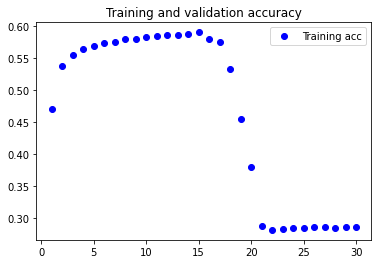

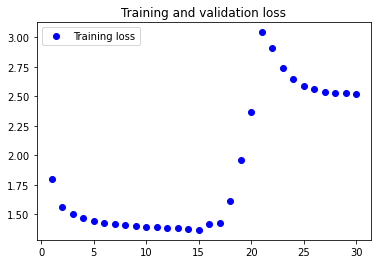

In [57]:
# Plot the Training and Validation Accuracy & Loss Scores
# Enter your code here:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the Model
model.save('chgen_model_1.h5')

## Step 3 – Evaluate the Model using Testing Data 

In [ ]:
# Model #1 (replicate where necessary for other models)
model.load_weights('chgen_model_1.h5')
# Enter your code here:


In [ ]:
# Save the Best Model
model.save('chgen_model_best.h5')

## Step 4 – Use the Best Model to make prediction

In [ ]:
model.load_weights('chgen_model_best.h5')

In [ ]:
# takes the user input
text_input = np.array([input()])

In [ ]:
# one-hot encode the user input
# Enter your code here:


In [ ]:
# show the model output using predict function
# Enter your code here:
